In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## EDA

In [3]:
df=pd.read_csv("dataset\heart.csv")

In [4]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
347,48,M,ASY,115,0,1,Normal,128,N,0.0,Flat,1
46,37,M,ASY,120,223,0,Normal,168,N,0.0,Up,0
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up,0
73,44,F,ASY,120,218,0,ST,115,N,0.0,Up,0
553,74,M,TA,145,216,1,Normal,116,Y,1.8,Flat,1
342,61,M,ASY,110,0,1,Normal,113,N,1.4,Flat,1
199,57,F,TA,130,308,0,Normal,98,N,1.0,Flat,0
588,67,M,ASY,140,219,0,ST,122,Y,2.0,Flat,1
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
854,52,M,ATA,120,325,0,Normal,172,N,0.2,Up,0


* ChestPainType: This is a categorical variable that indicates the type of chest pain experienced by the patient. The possible values are:
    1. TA: Typical Angina: This type of chest pain is caused by narrowing of the coronary arteries. It is usually brought on by exertion or stress and is relieved by rest.
    2. ATA: Atypical Angina: This type of chest pain is similar to typical angina, but it is not as well-defined or predictable. It may be caused by other factors, such as acid reflux or anxiety.
    3. NAP: Non-Anginal Pain: This type of chest pain is not caused by heart disease. It may be caused by muscle strain, indigestion, or other conditions.
    4. ASY: Asymptomatic: This patient does not experience any chest pain.
* RestingBP: This is a continuous variable that measures the patient's blood pressure at rest. Blood pressure is measured in millimeters of mercury (mm Hg). A normal blood pressure reading is less than 120/80 mm Hg.

* FastingBS: This is a binary variable that indicates whether the patient's fasting blood sugar level is greater than 120 mg/dL. A fasting blood sugar level of 126 mg/dL or higher is considered to be diabetic.

* RestingECG: This is a categorical variable that indicates the results of the patient's resting electrocardiogram. The possible values are:
    1. Normal: The electrocardiogram shows no signs of heart disease.
    2. ST: The electrocardiogram shows ST-T wave abnormality, which is a sign of heart muscle damage.
    3. LVH: The electrocardiogram shows left ventricular hypertrophy, which is a thickening of the heart muscle.

In [5]:
df.shape

(918, 12)

In [6]:
# List of columns to drop
columns_to_drop = ['ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [7]:
df.shape

(918, 9)

In [8]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
212,56,M,NAP,130,276,0,Normal,128,0
9,48,F,ATA,120,284,0,Normal,120,0
535,56,M,ASY,130,0,0,LVH,122,1
306,55,M,ASY,115,0,1,Normal,155,1
422,65,M,ASY,150,236,1,ST,105,1
418,60,M,ASY,132,218,0,ST,140,1
246,54,M,NAP,120,237,0,Normal,150,1
547,61,M,TA,142,200,1,ST,100,1
849,62,M,NAP,130,231,0,Normal,146,0
341,64,M,ASY,110,0,1,Normal,114,1


In [9]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            918 non-null    int64 
 1   Sex            918 non-null    object
 2   ChestPainType  918 non-null    object
 3   RestingBP      918 non-null    int64 
 4   Cholesterol    918 non-null    int64 
 5   FastingBS      918 non-null    int64 
 6   RestingECG     918 non-null    object
 7   MaxHR          918 non-null    int64 
 8   HeartDisease   918 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 64.7+ KB
None


In [10]:
# Display summary statistics of numerical columns
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

       HeartDisease  
count    918.000000  
mean       0.553377  
std        0.497414  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


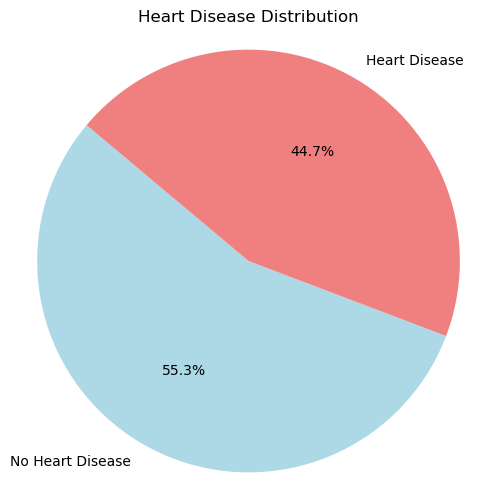

In [11]:
# Plot a pie chart for "HeartDisease" count
heart_disease_counts = df['HeartDisease'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

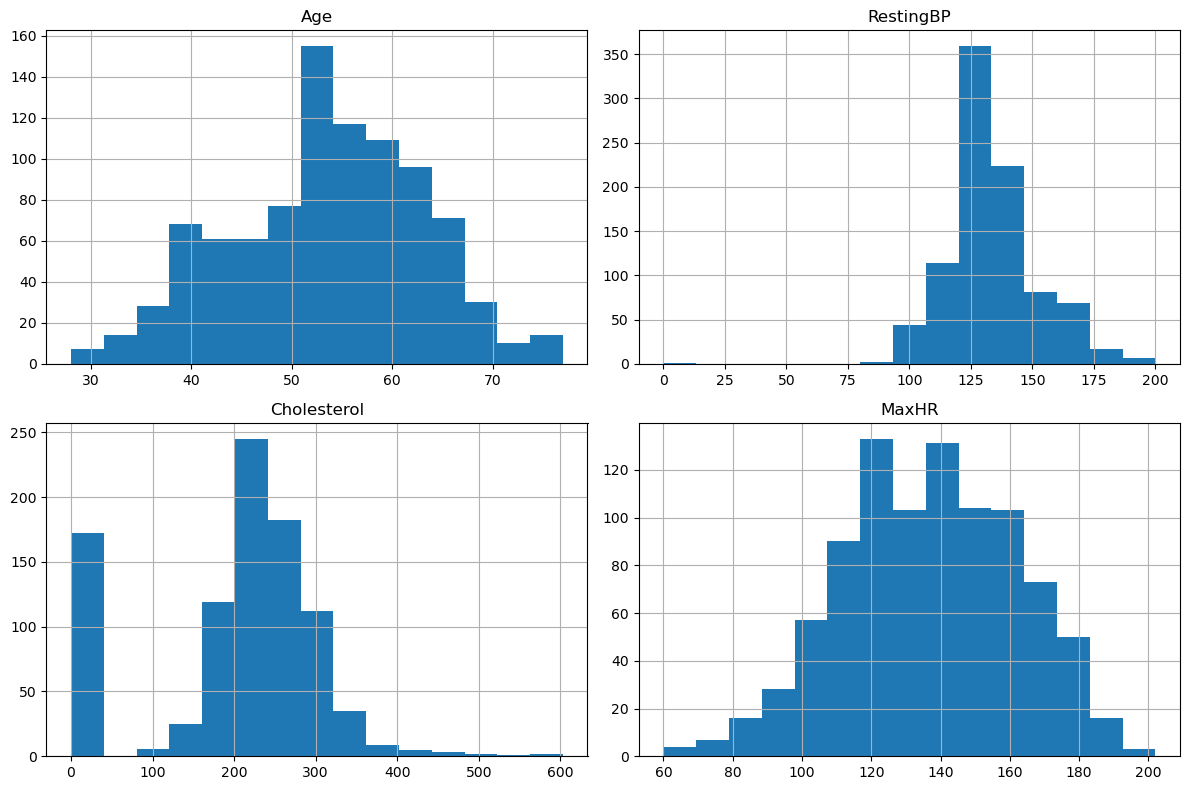

In [12]:
# Plot histograms of numerical features
numerical_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR"]
df[numerical_cols].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

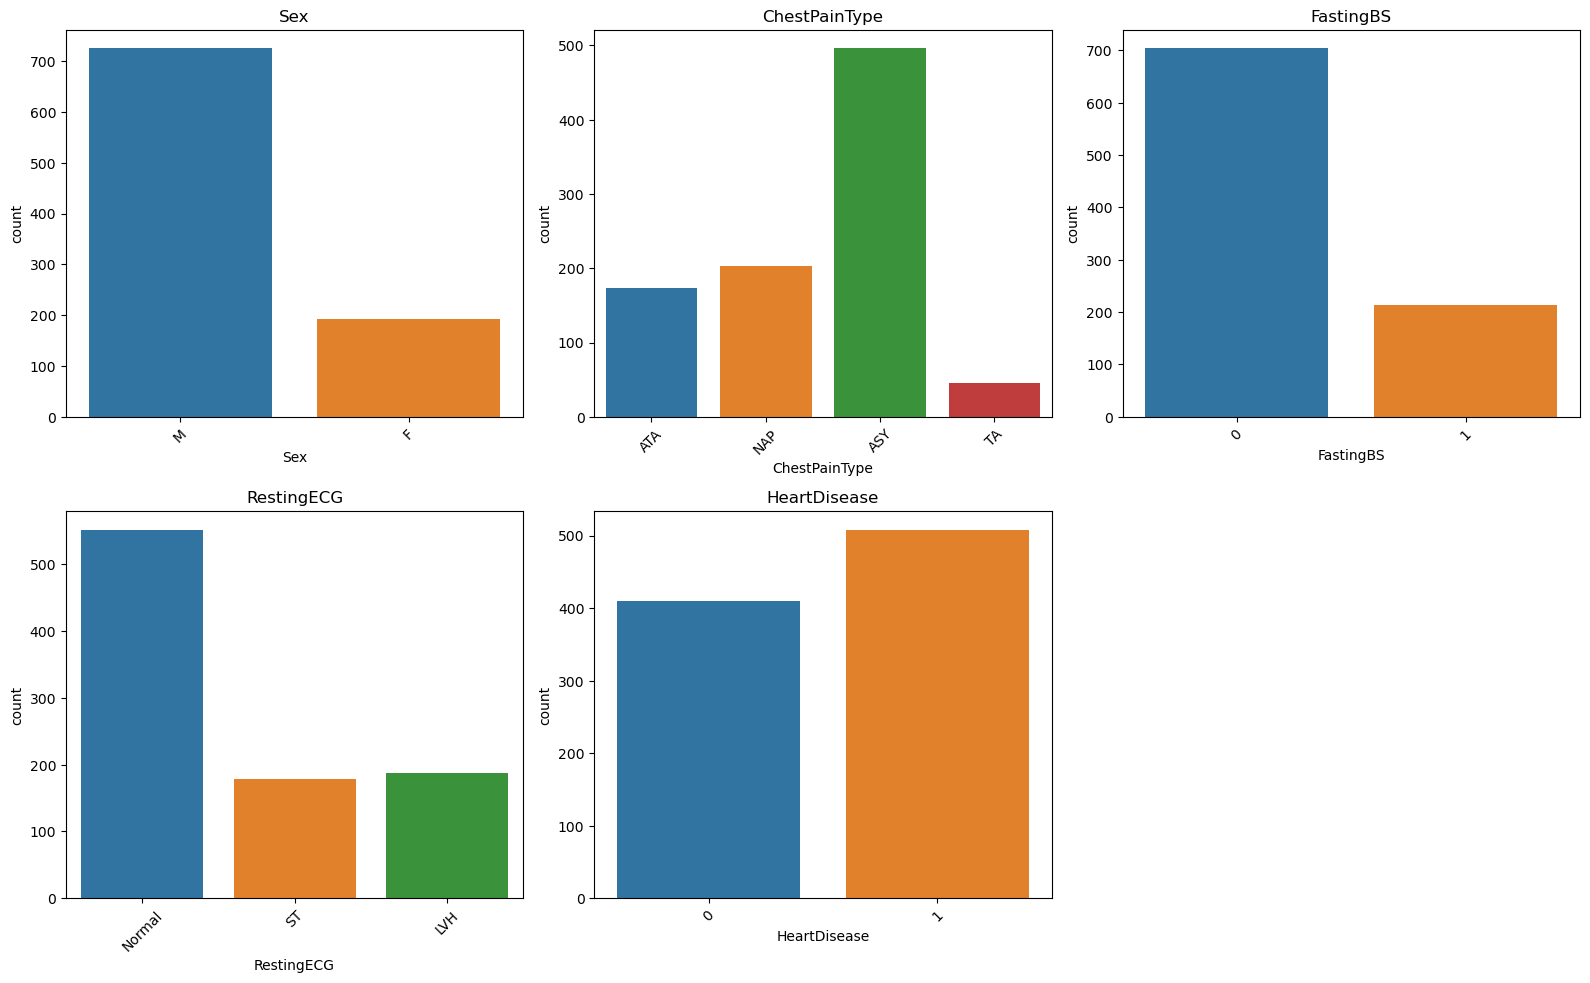

In [13]:
# Plot count plots for categorical features
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "HeartDisease"]
plt.figure(figsize=(16, 14))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


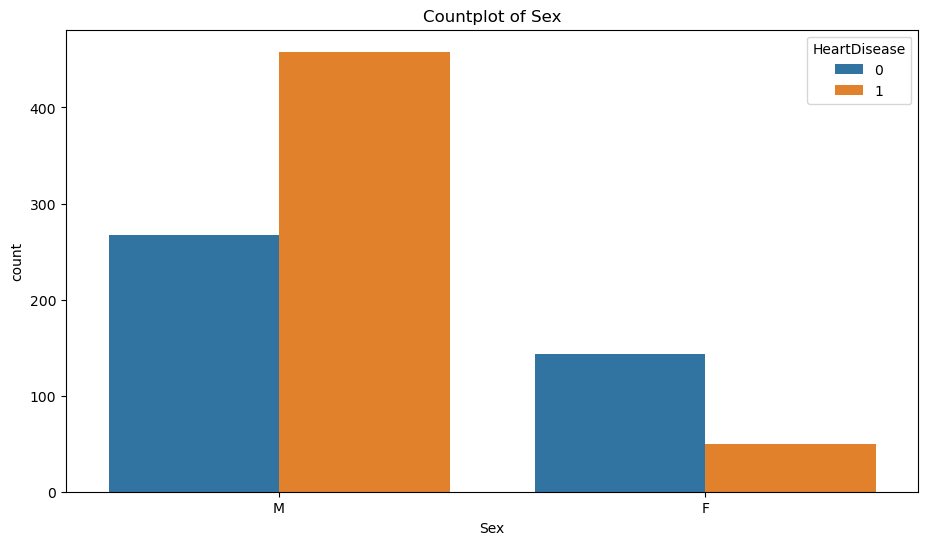

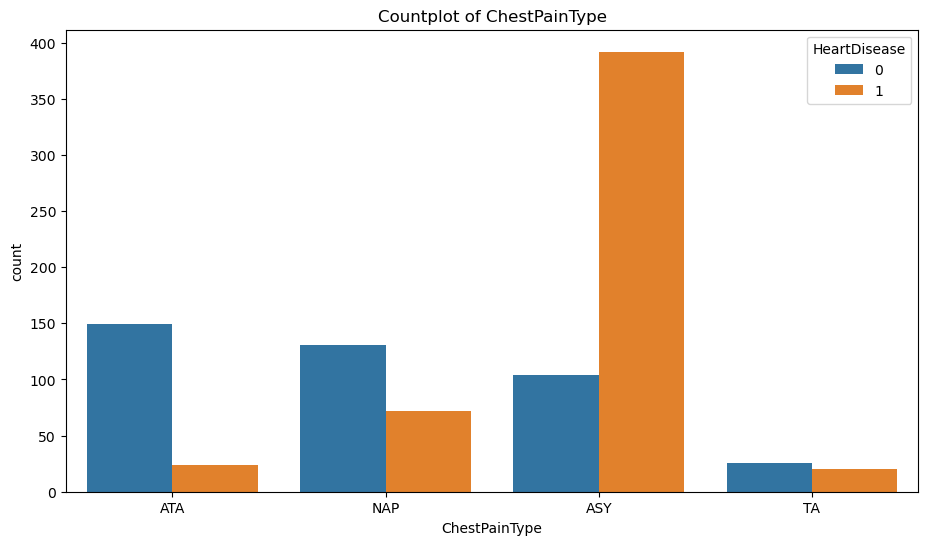

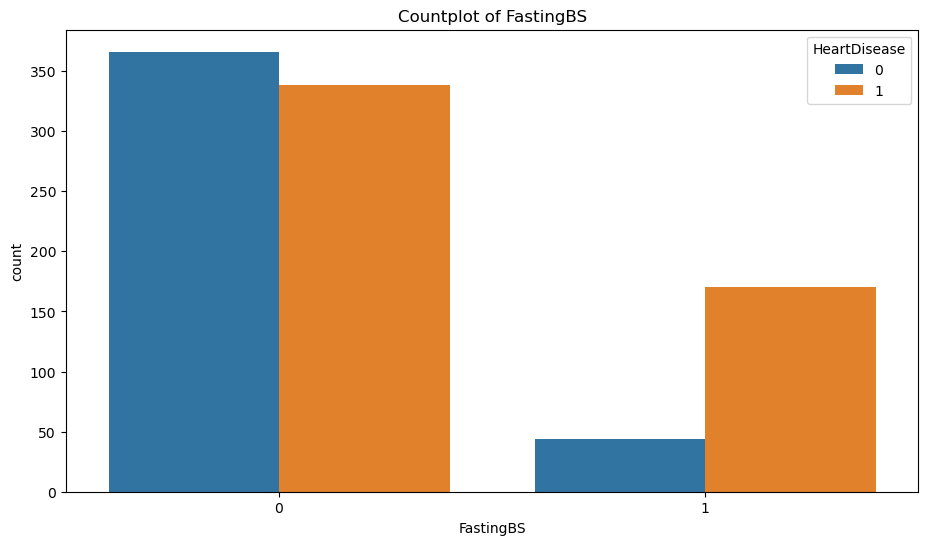

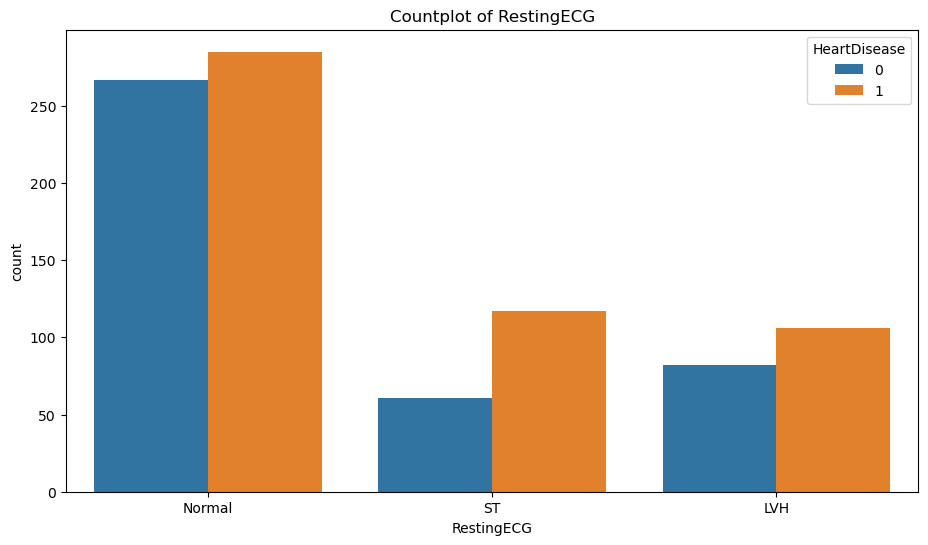

In [14]:
# Countplot for categorical variables
categorical_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG']
for var in categorical_vars:
    plt.figure(figsize=(11, 6))
    sns.countplot(x=var, hue='HeartDisease', data=df)
    plt.title(f'Countplot of {var}')
    plt.show()

/tmp/ipykernel_33/1549508670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


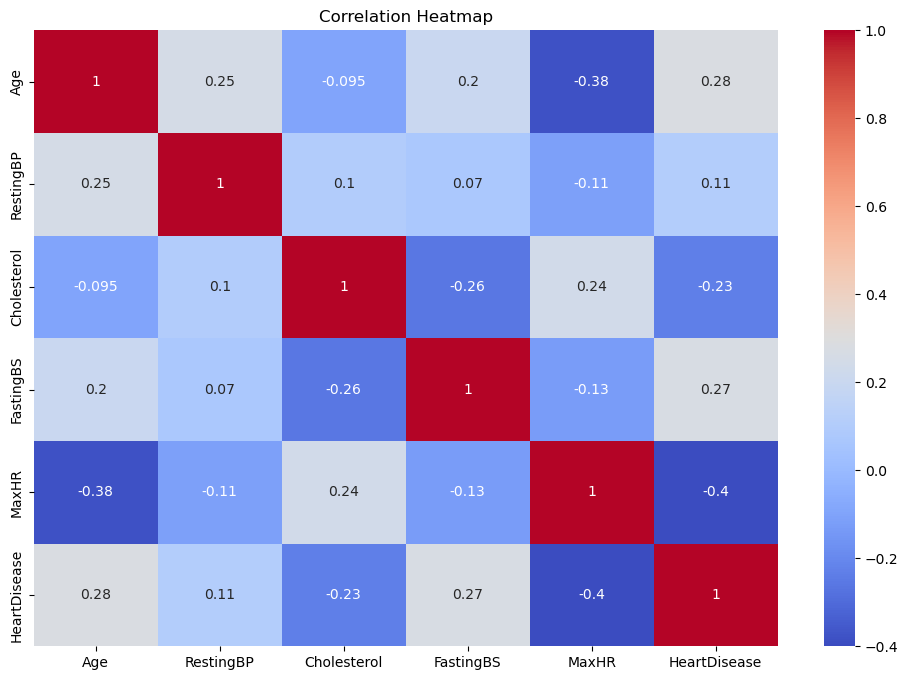

In [15]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Separate features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0
1,49,F,NAP,160,180,0,Normal,156,1
2,37,M,ATA,130,283,0,ST,98,0
3,48,F,ASY,138,214,0,Normal,108,1
4,54,M,NAP,150,195,0,Normal,122,0
...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,1
914,68,M,ASY,144,193,1,Normal,141,1
915,57,M,ASY,130,131,0,Normal,115,1
916,57,F,ATA,130,236,0,LVH,174,1


In [44]:
# Define column transformers for one-hot encoding and normalization
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG']
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR']

In [45]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])


---------------------------------------------------------------------------------------------------------------------------
CatBoost Accuracy: 0.80
CatBoost F1-score: 0.83
CatBoost Recall: 0.84


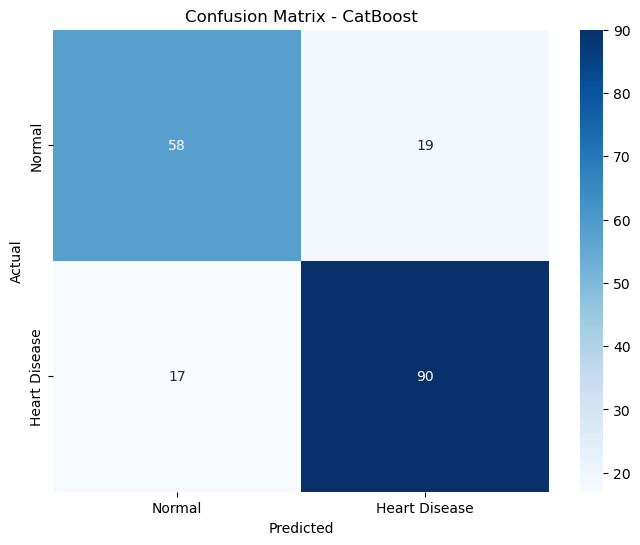

---------------------------------------------------------------------------------------------------------------------------
XGBoost Accuracy: 0.78
XGBoost F1-score: 0.81
XGBoost Recall: 0.78


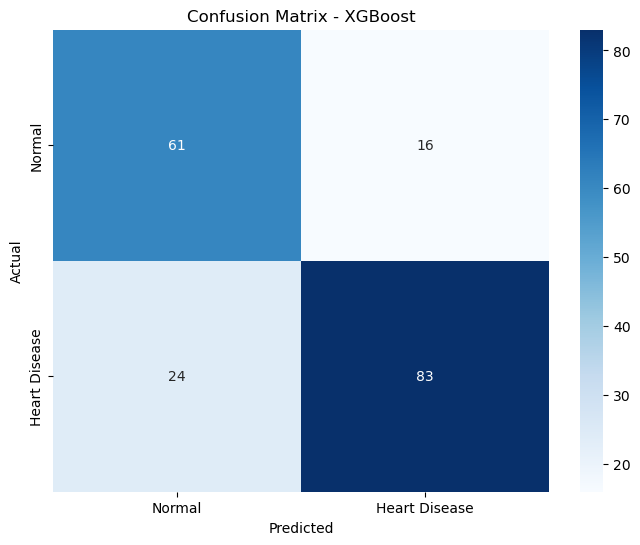

---------------------------------------------------------------------------------------------------------------------------
LightGBM Accuracy: 0.80
LightGBM F1-score: 0.83
LightGBM Recall: 0.82


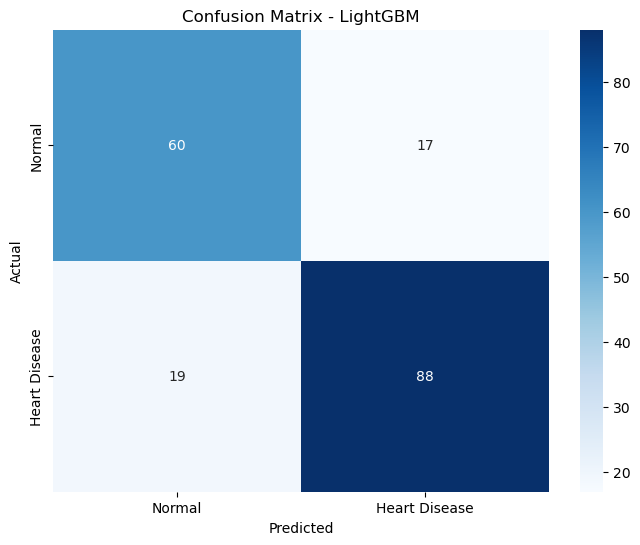

---------------------------------------------------------------------------------------------------------------------------
Random Forest Accuracy: 0.79
Random Forest F1-score: 0.82
Random Forest Recall: 0.81


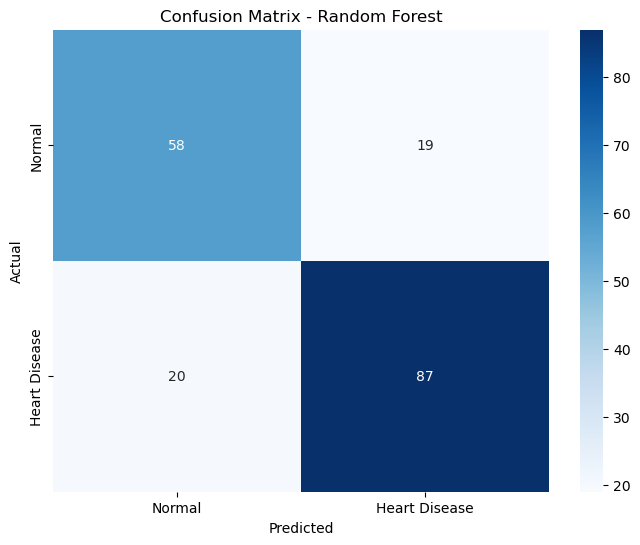

In [60]:
# Define a list of classifiers
classifiers = [
    ('CatBoost', CatBoostClassifier(random_state=42,verbose=False)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('Random Forest',RandomForestClassifier(random_state=42)),
]

# Loop through classifiers
for classifier_name, classifier in classifiers:
    # Build the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', classifier)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    print("---------------------------------------------------------------------------------------------------------------------------")
    # Calculate accuracy, F1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"{classifier_name} Accuracy: {accuracy:.2f}")
    print(f"{classifier_name} F1-score: {f1:.2f}")
    print(f"{classifier_name} Recall: {recall:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy CatBoost : 0.80
F1-score CatBoost: 0.83
Recall CatBoost: 0.84


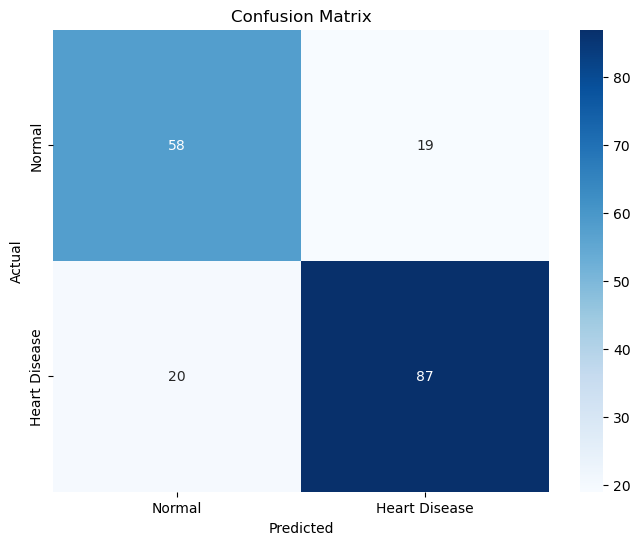

In [61]:
# Build the pipeline with preprocessing and model
pipeline_CBC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CatBoostClassifier(random_state=42,verbose=False))
])
# Train the model
pipeline_CBC.fit(X_train, y_train)
# Predict on test set
y_pred_CBC = pipeline_CBC.predict(X_test)
# Calculate accuracy score
# Calculate accuracy, F1-score, and recall
accuracy_CBC = accuracy_score(y_test, y_pred_CBC)
f1_CBC = f1_score(y_test, y_pred_CBC)
recall_CBC = recall_score(y_test, y_pred_CBC)

print(f"Accuracy CatBoost : {accuracy_CBC:.2f}")
print(f"F1-score CatBoost: {f1_CBC:.2f}")
print(f"Recall CatBoost: {recall_CBC:.2f}")
# Confusion matrix
cm_CBC = confusion_matrix(y_test, y_pred_CBC)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Assume you have the trained CatBoost model named 'catboost_model'
# You should replace 'catboost_model' with your actual trained model

# Take input from the user
sample_input = {
    'Age': 48,
    'Sex': 'F',
    'ChestPainType': 'ASY',
    'RestingBP': 138,
    'Cholesterol': 214,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 108
}

# Convert the input into a DataFrame
input_df = pd.DataFrame([sample_input])


# Predict using the trained CatBoost model
predicted_output = pipeline_CBC.predict(input_df)

# Convert the prediction to meaningful label
output_label = 'Heart Disease' if predicted_output == 1 else 'Normal'

print(f"Predicted Output: {output_label}")


Predicted Output: Heart Disease
